In [ ]:
Задача 1 Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

model = LinearRegression()

zp = np.array([35,45,190,200,40,70,54,150,120,110])
ks = np.array([401,574,874,919,459,739,653,902,746,832])
zp1 = zp.reshape (-1,1)
zp1

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [8]:
model.fit(zp1, ks)
model.intercept_, model.coef_

(444.1773573243596, array([2.62053888]))

<function matplotlib.pyplot.show(close=None, block=None)>

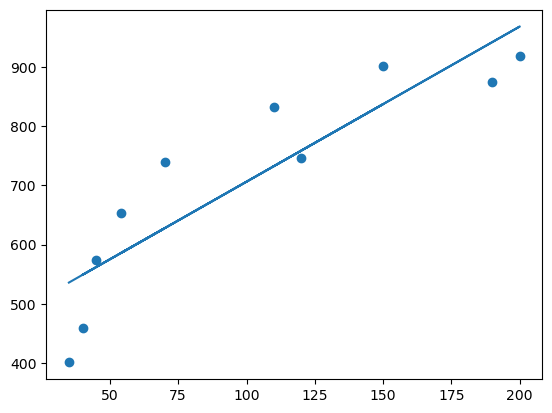

In [9]:
plt.scatter(zp, ks)
plt.plot(zp, 444.17 + 2.62*zp)
plt.show


In [33]:
model.score(zp1, ks)

0.7876386635293686

In [34]:
e = ks - (444.17 + 2.62*zp)
e

array([-134.87,   11.93,  -67.97,  -49.17,  -89.97,  111.43,   67.35,
         64.83,  -12.57,   99.63])

In [35]:
import scipy.stats as st
st.shapiro(e)

ShapiroResult(statistic=0.9479730129241943, pvalue=0.6445836424827576)

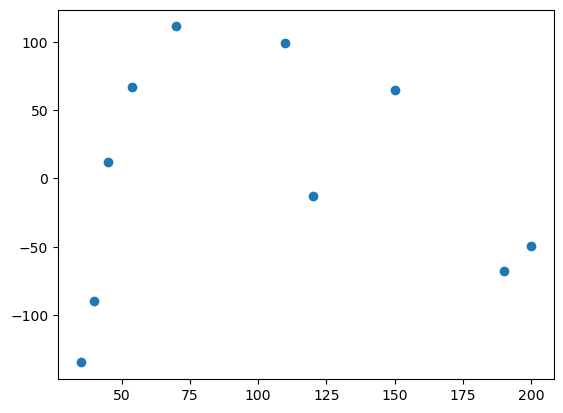

In [39]:
ks_pred = (444.17 + 2.62*zp)
ks_pred
plt.scatter(zp, ks - ks_pred)

In [ ]:
Задача 2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

In [43]:
def mse(b1, ks = ks, zp = zp, n = 10):
    return np.sum((b1*zp-ks)**2) / n

alpha = 1e-6

b1 = 0.1

n = 10

for i in range(300):
    b1 -= alpha * (2/n) * np.sum ((b1*zp-ks)*zp)
    if i % 20 == 0:
        print('B1 = {}'.format(b1))
        print(mse(b1, ks, zp, n))

B1 = 0.25952808
493237.7212546963
B1 = 2.6698789606516935
199352.96411174876
B1 = 4.04834889855975
103233.54824312925
B1 = 4.836690291080364
71796.25222021657
B1 = 5.287539550879594
61514.21323463749
B1 = 5.54537842245223
58151.31823171113
B1 = 5.692835432193034
57051.433003054815
B1 = 5.777165500770666
56691.69904907657
B1 = 5.825393526544474
56574.04266614384
B1 = 5.852974939784972
56535.56138215128
B1 = 5.868748638669329
56522.97550129376
B1 = 5.877769553381888
56518.85910026643
B1 = 5.882928578088004
56517.512769595625
B1 = 5.885879003490128
56517.072431964974
B1 = 5.887566339866551
56516.928412941146


<function matplotlib.pyplot.show(close=None, block=None)>

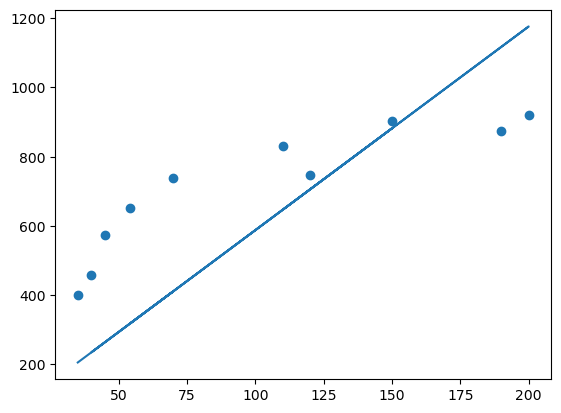

In [44]:
plt.scatter(zp, ks)
plt.plot(zp, 5.88*zp)
plt.show

In [ ]:
Задача 3 (Дополнительно) Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что
изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно
влиять на изменение другого во время одной итерации).

In [52]:
def mse(b0, b1, ks = ks, zp = zp, n = 10):
    return np.sum(((b0+b1*zp)-ks)**2) / n
b1 = 0.1
b0 = 0.1
for i in range(200):
    b1 -= alpha * (2/n) * np.sum (((b0+b1*zp)-ks)*zp)
    for k in range(200):
        b0 -= alpha * (2/n) * np.sum (((b0+b1*zp)-ks)*zp)
        if k % 50 == 0:
            print('B1 = {}, B0 = {}'.format(b1, b0))
            print(mse(b0, b1, ks, zp, n))

B1 = 0.2595078, B0 = 0.25511284968504
492892.14933292643
B1 = 0.2595078, B0 = 7.970780333881142
482406.974446805
B1 = 0.2595078, B0 = 15.608598419147686
472144.85981387505
B1 = 0.2595078, B0 = 23.169352588908648
462101.2003437211
B1 = 0.40845454130680725, B0 = 30.649716441879285
430401.72303191293
B1 = 0.40845454130680725, B0 = 37.85452729613157
421262.7001880223
B1 = 0.40845454130680725, B0 = 44.986643183220785
412318.1407106004
B1 = 0.40845454130680725, B0 = 52.04679757948071
403564.0295032229
B1 = 0.5475394747452783, B0 = 59.03188432564113
375926.80366304505
B1 = 0.5475394747452783, B0 = 65.75966251876268
367961.33328719623
B1 = 0.5475394747452783, B0 = 72.41955890003342
360165.39329231984
B1 = 0.5475394747452783, B0 = 79.01225838210163
352535.48301034933
B1 = 0.6774155535359985, B0 = 85.53486046542271
328440.1558157742
B1 = 0.6774155535359985, B0 = 91.81719047123087
321497.75349095825
B1 = 0.6774155535359985, B0 = 98.0361331400612
314703.1431866345
B1 = 0.6774155535359985, B0 = 104

B1 = 2.4307097035189007, B0 = 443.587214231316
6989.922814670313
B1 = 2.4307097035189007, B0 = 443.853393530376
6979.432298710795
B1 = 2.4307097035189007, B0 = 444.11688713847275
6969.18719519039
B1 = 2.43590052356145, B0 = 444.37757912993834
6932.619580775463
B1 = 2.43590052356145, B0 = 444.6286680510983
6923.381234301145
B1 = 2.43590052356145, B0 = 444.8772235399107
6914.360290084584
B1 = 2.43590052356145, B0 = 445.1232711581537
6905.552061140438
B1 = 2.4407476578711687, B0 = 445.36670265563265
6873.79024068466
B1 = 2.4407476578711687, B0 = 445.60116690493595
6865.85397627058
B1 = 2.4407476578711687, B0 = 445.83326546119775
6858.106075583823
B1 = 2.4407476578711687, B0 = 446.063022193744
6850.5424638840195
B1 = 2.4452738619822467, B0 = 446.2903360196568
6822.962922520566
B1 = 2.4452738619822467, B0 = 446.5092763215522
6816.15413125259
B1 = 2.4452738619822467, B0 = 446.72600756364335
6809.508462835545
B1 = 2.4452738619822467, B0 = 446.9405520348604
6803.022375580536
B1 = 2.44950038477

B1 = 2.5072973074538765, B0 = 458.95327431666925
6526.073562910119
B1 = 2.5072973074538765, B0 = 458.9594242970396
6526.114107224983
B1 = 2.5072973074538765, B0 = 458.9655122254523
6526.154316960094
B1 = 2.5074172395503296, B0 = 458.9715354234841
6526.179989397184
B1 = 2.5074172395503296, B0 = 458.9773367459082
6526.21858610782
B1 = 2.5074172395503296, B0 = 458.98307953425643
6526.256859681462
B1 = 2.5074172395503296, B0 = 458.98876437912514
6526.294812047431
B1 = 2.5075292309071457, B0 = 458.9943887794312
6526.320057686037
B1 = 2.5075292309071457, B0 = 458.9998059945787
6526.356467454291
B1 = 2.5075292309071457, B0 = 459.0051685512092
6526.392567663076
B1 = 2.5075292309071457, B0 = 459.01047700081506
6526.428360275136
B1 = 2.507633807283049, B0 = 459.01572900791035
6526.453044385278
B1 = 2.507633807283049, B0 = 459.02078754763795
6526.487364820359
B1 = 2.507633807283049, B0 = 459.02579504780533
6526.521389375447
B1 = 2.507633807283049, B0 = 459.0307520233901
6526.555120023875
B1 = 2.5

B1 = 2.5090696084650057, B0 = 459.30885775872986
6528.494032849916
B1 = 2.5090696084650057, B0 = 459.30899044386257
6528.495048841843
B1 = 2.5090696084650057, B0 = 459.309121790231
6528.49605461731
B1 = 2.5090721959864566, B0 = 459.3092517400489
6528.497043131043
B1 = 2.5090721959864566, B0 = 459.3093769029257
6528.498001687178
B1 = 2.5090721959864566, B0 = 459.3095008029363
6528.498950602549
B1 = 2.5090721959864566, B0 = 459.30962345282296
6528.499889973813
B1 = 2.5090746121873457, B0 = 459.3097447986249
6528.500813630296
B1 = 2.5090746121873457, B0 = 459.30986167443046
6528.5017088917
B1 = 2.5090746121873457, B0 = 459.30997737098477
6528.502595147021
B1 = 2.5090746121873457, B0 = 459.31009190018625
6528.503472486587
B1 = 2.509076868410858, B0 = 459.31020521164675
6528.504335504173
B1 = 2.509076868410858, B0 = 459.3103143490703
6528.50517163964
B1 = 2.509076868410858, B0 = 459.3104223853216
6528.50599936215
B1 = 2.509076868410858, B0 = 459.3105293315107
6528.506818756113
B1 = 2.509078